<h1><center>INFO 370 Final Project Resource: Predicting Global Dietary Risks</center></h1>
<h2><center>Brian Luu, Sherry Gao, Youta Ishii, Zak Zheng</center></h2>

In this project, we aim to gain understanding of how certain food cultures influence the overall health of a person. We will be taking a look at countries with unique food cultures and seeing how the differences influence a human being based on several health metrics. (Life Expectancy, Rate of Disease Infection, Infant Mortality Rates, etc.)  


We obtained our dataset from GHDx: 
http://ghdx.healthdata.org/gbd-results-tool/

The column glossary can be found on
http://www.healthdata.org/terms-defined

## Set up

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
import seaborn as sns
import statsmodels.formula.api as smf # linear modeling
import statsmodels.api as sm

# Read in data
import pandas as pd
df = pd.read_csv('./final.csv')
#import the module so that we can tables when printing dataframes
from IPython.display import display, HTML

**We will be taking in data from the following years to train our model**

In [2]:
df_years = df.year.unique()
print(df_years)

[1990 1995 2000 2010 2005 2015]


**We will be taking data that are collected from the following 8 regions**

In [3]:
df_locations = df.location_name.unique()
print(df_locations)

['Global' 'Latin America & Caribbean - WB' 'Europe & Central Asia - WB'
 'North America' 'South Asia - WB' 'East Asia & Pacific - WB'
 'Sub-Saharan Africa - WB' 'Middle East & North Africa - WB']


In [4]:
# Create dataframes for each risk
df = df[df.rei_name != 'Low physical activity']
df = df[df.rei_name != 'Dietary risks']


alcohol_use = df.loc[df['rei_name'] == 'Alcohol use']
iron_deficiency = df.loc[df['rei_name'] == 'Iron deficiency']
vitamin_a_def = df.loc[df['rei_name'] == 'Vitamin A deficiency']
zinc_def = df.loc[df['rei_name'] == 'Zinc deficiency']
low_fruits = df.loc[df['rei_name'] == 'Diet low in fruits']
low_vegetables = df.loc[df['rei_name'] == 'Diet low in vegetables']
low_wholegrains = df.loc[df['rei_name'] == 'Diet low in whole grains']
low_nutsseeds = df.loc[df['rei_name'] == 'Diet low in nuts and seeds']
low_milk = df.loc[df['rei_name'] == 'Diet low in milk']
high_redmeat = df.loc[df['rei_name'] == 'Diet high in red meat']
high_processedmeat = df.loc[df['rei_name'] == 'Diet high in processed meat']
high_sugarbev = df.loc[df['rei_name'] == 'Diet high in sugar-sweetened beverage']
low_fiber = df.loc[df['rei_name'] == 'Diet low in fiber']
suboptimal_calcium = df.loc[df['rei_name'] == 'Diet suboptimal in calcium']
low_omega3 = df.loc[df['rei_name'] == 'Diet low in seafood omega-3 fatty acids']
low_polyunsaturated = df.loc[df['rei_name'] == 'Diet low in polyunsaturated fatty acids']
high_transfattyacid = df.loc[df['rei_name'] == 'Diet high in trans fatty acids']
high_sodium = df.loc[df['rei_name'] == 'Diet high in sodium']

<h3>Create a chart for a risk and see its prominence in each of the world's regions and prediction for 2020:</h3>

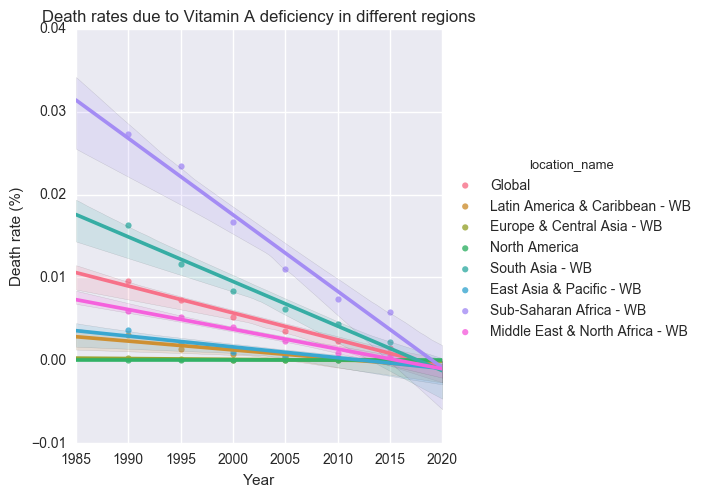

In [11]:
from ipywidgets import widgets
from IPython.display import display
from IPython.display import clear_output

columns = df.rei_name.unique().tolist()
selection = widgets.Dropdown(description = 'Select a risk')
selection.options = columns
display(selection)

def on_button_clicked(b):
    clear_output()
    p = sns.lmplot(x="year", y="val", hue="location_name", data=df[df['rei_name']==selection.value]);
    plt.xlabel('Year')
    plt.ylabel('Death rate (%)')
    plt.title('Death rates due to ' + selection.value + ' in different regions')
    
button = widgets.Button(description='Create graph')
display(button)

button.on_click(on_button_clicked)

<h3>Create a chart for a region and see each of the risk and its prominence in the region and prediction fo 2020:</h3>

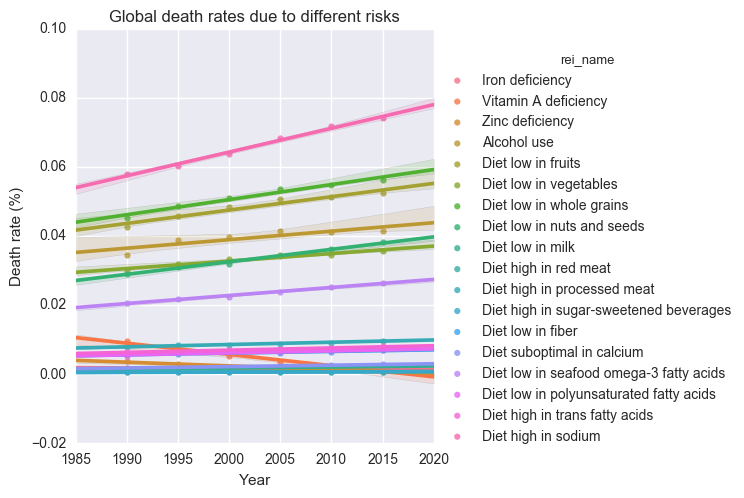

In [8]:
columns2 = df.location_name.unique().tolist()
selection2 = widgets.Dropdown(description = 'Select a location')
selection2.options = columns2
display(selection2)

def on_button2_clicked(b):
    clear_output()
    p2 = sns.lmplot(x="year", y="val", hue="rei_name", data=df[df['location_name']==selection2.value]);
    plt.xlabel('Year')
    plt.ylabel('Death rate (%)')
    plt.title(selection2.value + ' death rates due to different risks')
    
button2 = widgets.Button(description='Create graph')
display(button2)

button2.on_click(on_button2_clicked)

<h3>Our analysis will produce the risk's influence on deaths in the year 2020 as well produce a summary table of its statistics:</h3>

In [7]:
selection4 = widgets.Dropdown(description = 'Select a risk')
selection4.options = columns
display(selection4)

selection5 = widgets.Dropdown(description = 'Select a location')
selection5.options = columns2
display(selection5)

def on_button4_clicked(b):
    clear_output()
    print(selection4.value + " in " + selection5.value +  ": Summary")
    data1 = df[df['rei_name']==selection4.value]
    data2 = data1[data1['location_name']==selection5.value]
    lm = smf.ols(formula='val ~ year', data=data2).fit()
    print(lm.summary())
    print()
    
    print('Predictions for ' + selection4.value + ' in ' + selection5.value + 'for year 2020')
    for locations in df['location_name'].unique():
        tempdf = df[df.location_name == locations]
        tempdf = tempdf[tempdf.rei_name == selection4.value]
        X = tempdf['year']
        y = tempdf['val']
        model = sm.OLS(y, X)
        results = model.fit()
        d = []
        d.append([locations, results.predict(2020)])
        for item in d:
            print(item[0], ', '.join(map(str, item[1:])))
    
button4 = widgets.Button(description='Predict')
display(button4)

button4.on_click(on_button4_clicked)

Iron deficiency in North America: Summary
                            OLS Regression Results                            
Dep. Variable:                    val   R-squared:                       0.501
Model:                            OLS   Adj. R-squared:                  0.377
Method:                 Least Squares   F-statistic:                     4.020
Date:                Wed, 08 Mar 2017   Prob (F-statistic):              0.115
Time:                        03:34:28   Log-Likelihood:                 67.851
No. Observations:                   6   AIC:                            -131.7
Df Residuals:                       4   BIC:                            -132.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept 